### 2 结合归一化和正则化来优化网络模型结构，观察对比loss结果

In [1]:
import torch 
import torch.nn as nn   
import torch.optim as optim 
from torch.utils.data import DataLoader  
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

LR = 1e-3
epochs = 20
BATCH_SIZE = 20
olivetti_faces = fetch_olivetti_faces(data_home='./', shuffle=True)
X = olivetti_faces.data
y = olivetti_faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
train_dataset = [(img, lbl) for img, lbl in zip(x_train, y_train)]
test_dataset = [(img, lb1) for img, lb1 in zip(x_test, y_test)]
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from torchnet import TorchNN
models = TorchNN()

models = [
    TorchNN(use_batchnorm=True, use_dropout=True),
    TorchNN(use_batchnorm=False, use_dropout=True),
    TorchNN(use_batchnorm=True, use_dropout=False),
    TorchNN(use_batchnorm=False, use_dropout=False)
]



In [2]:
loss_histories = []
for model in models:
    model.to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    loss_history = []
    for epoch in range(epochs):
        model.train()
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())
        print(f'Epoch:{epoch} Loss: {loss.item()}')
    loss_histories.append(loss_history)



Epoch:0 Loss: 3.6227333545684814
Epoch:1 Loss: 3.3510329723358154
Epoch:2 Loss: 3.232098340988159
Epoch:3 Loss: 3.337427854537964
Epoch:4 Loss: 2.940363645553589
Epoch:5 Loss: 2.960181951522827
Epoch:6 Loss: 2.9871914386749268
Epoch:7 Loss: 2.894634485244751
Epoch:8 Loss: 2.8561747074127197
Epoch:9 Loss: 2.8701038360595703
Epoch:10 Loss: 2.7670698165893555
Epoch:11 Loss: 2.7718346118927
Epoch:12 Loss: 2.7664566040039062
Epoch:13 Loss: 2.767585039138794
Epoch:14 Loss: 2.739912509918213
Epoch:15 Loss: 2.73439359664917
Epoch:16 Loss: 2.733811616897583
Epoch:17 Loss: 2.7317066192626953
Epoch:18 Loss: 2.7340240478515625
Epoch:19 Loss: 2.7331385612487793
Epoch:0 Loss: 3.7251040935516357
Epoch:1 Loss: 3.730938673019409
Epoch:2 Loss: 3.7309391498565674
Epoch:3 Loss: 3.680939197540283
Epoch:4 Loss: 3.680939197540283
Epoch:5 Loss: 3.680939197540283
Epoch:6 Loss: 3.63093900680542
Epoch:7 Loss: 3.730938673019409
Epoch:8 Loss: 3.680939197540283
Epoch:9 Loss: 3.63093900680542
Epoch:10 Loss: 3.730939

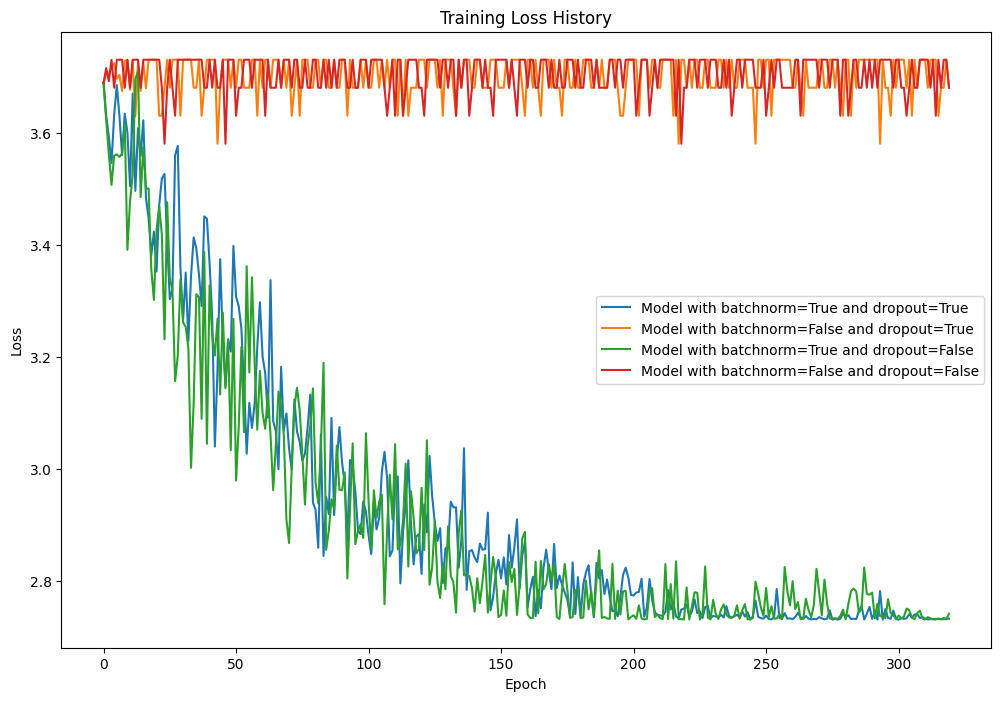

In [3]:
# 绘制损失图像
plt.figure(figsize=(12, 8))
for i, loss_history in enumerate(loss_histories):
    plt.plot(loss_history, label=f'Model with batchnorm={i % 2 == 0} and dropout={i // 2 == 0}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.show()